In [51]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

In [52]:
customers = pd.read_csv("segmentation data.csv")
df = customers.copy()
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [54]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [55]:
df = df.drop(columns=["ID"])

In [57]:
num_cols = ["Age", "Income"]
cat_cols = ['Sex','Marital status','Education','Occupation','Settlement size']

In [58]:
cat_cols

['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']

In [59]:
df[cat_cols] = df[cat_cols].astype("str")

In [60]:
df.describe(include="object").T

,count,unique,top,freq
Sex,2000,2,0,1086
Marital status,2000,2,0,1007
Education,2000,4,1,1386
Occupation,2000,3,1,1113
Settlement size,2000,3,0,989


In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2000.0,35.909,11.719402,18.0,27.00,33.0,42.00,76.0
Income,2000.0,120954.419,38108.824679,35832.0,97663.25,115548.5,138072.25,309364.0


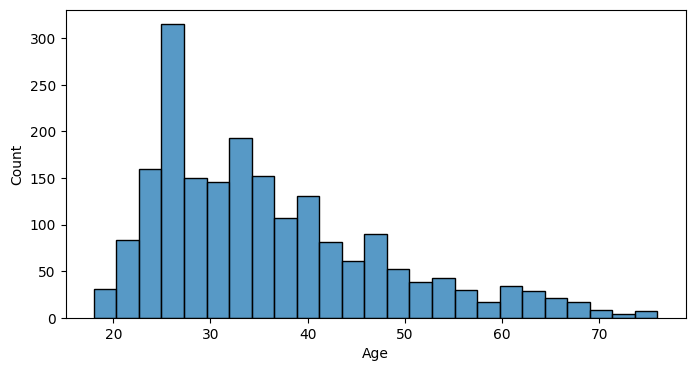

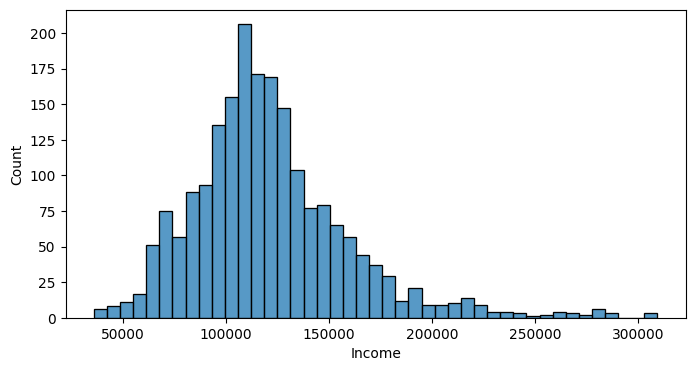

In [62]:
for num in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=num)

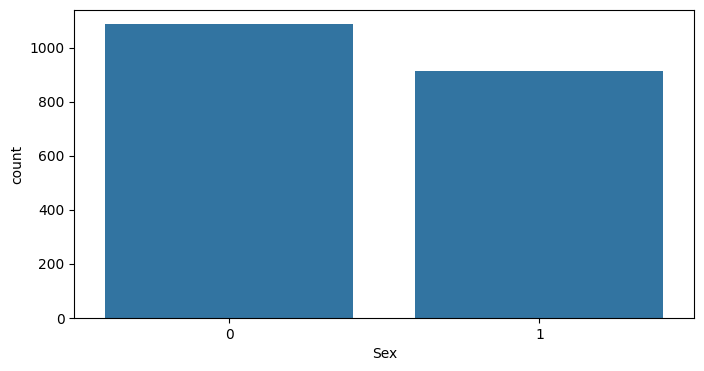

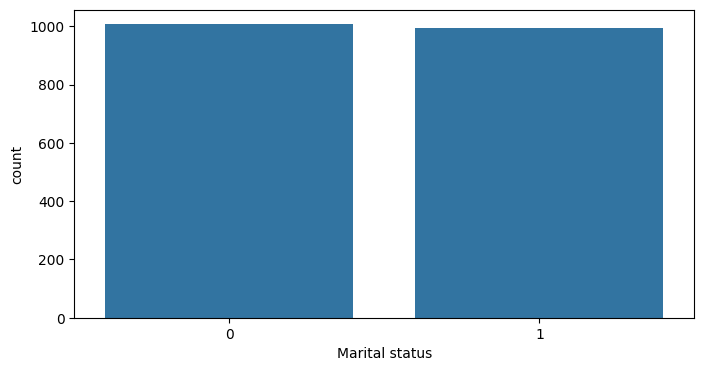

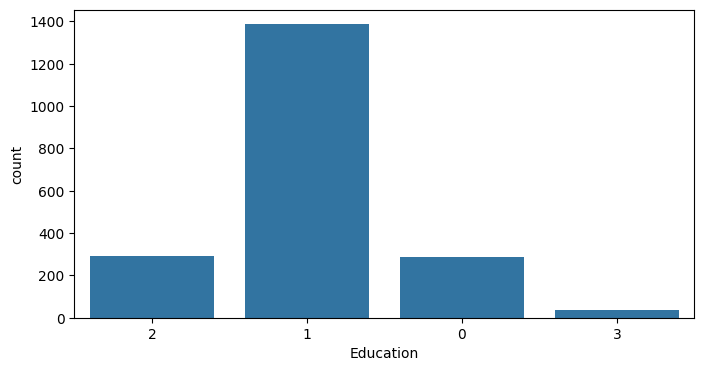

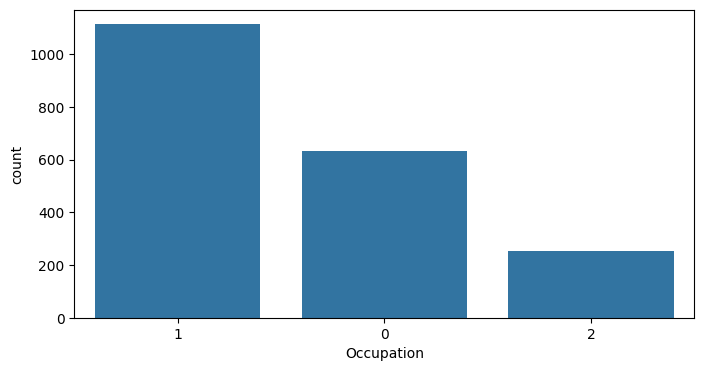

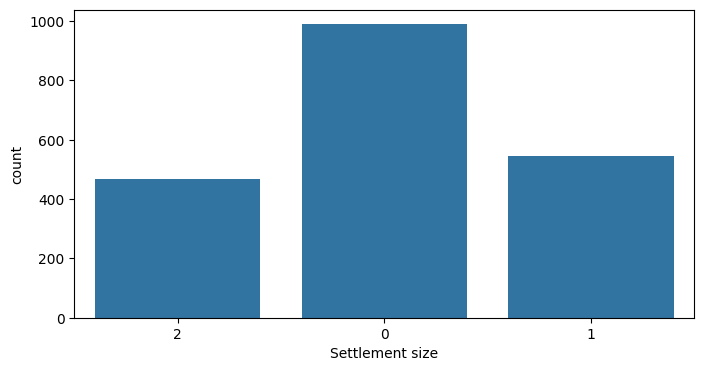

In [63]:
for category in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=category)

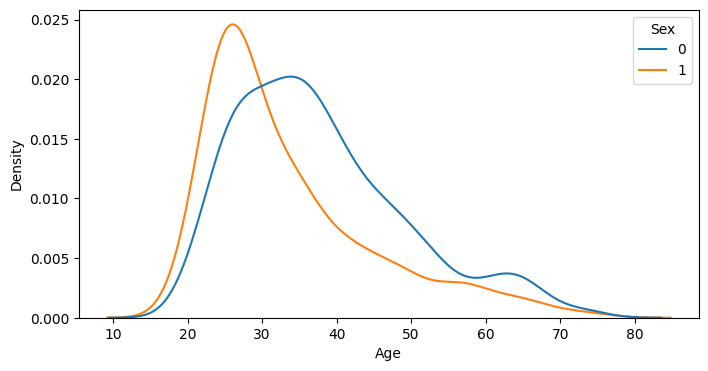

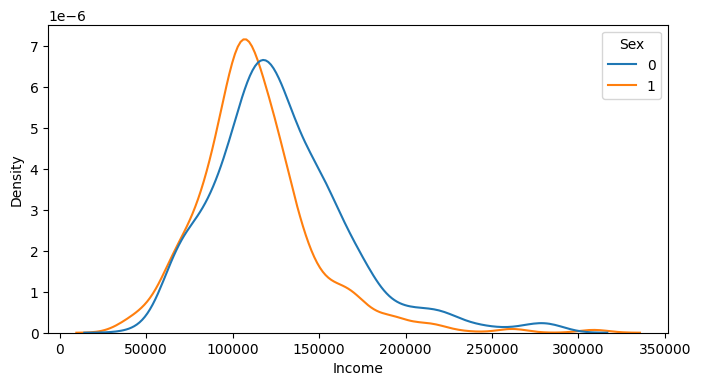

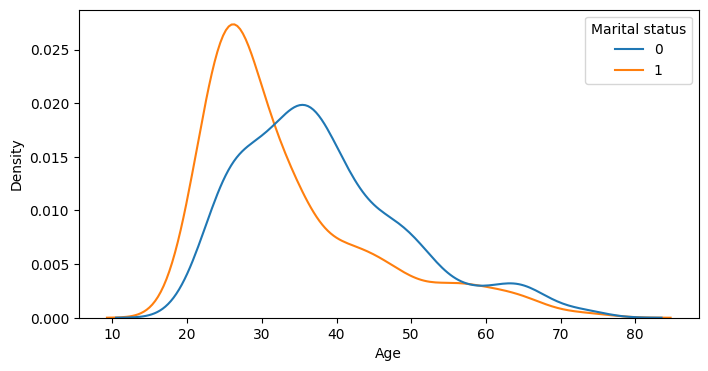

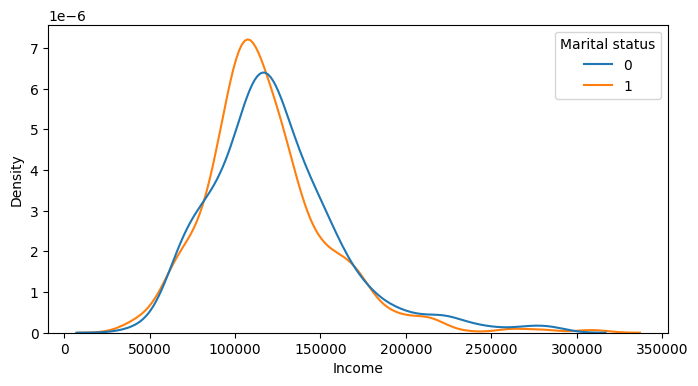

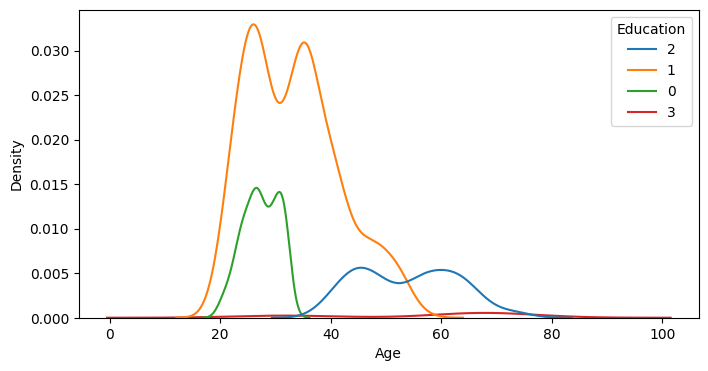

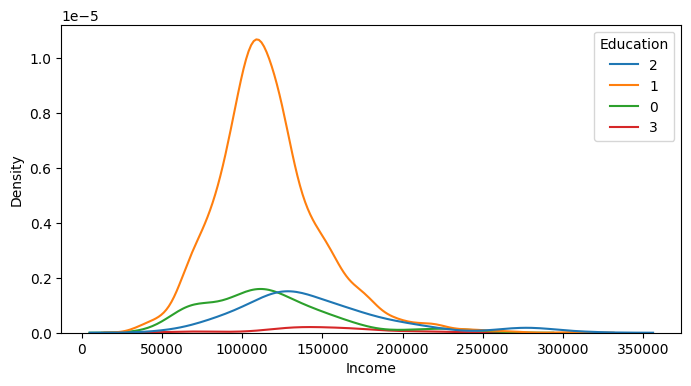

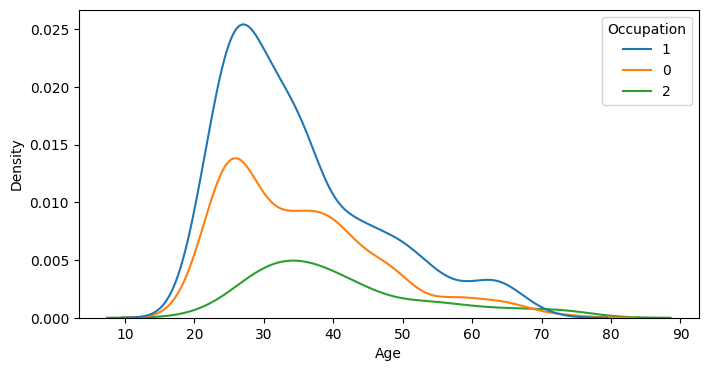

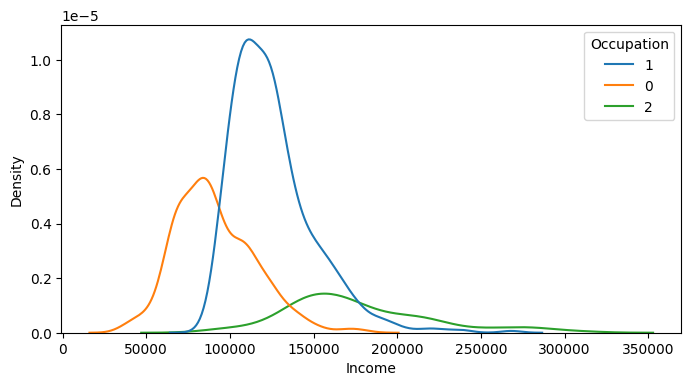

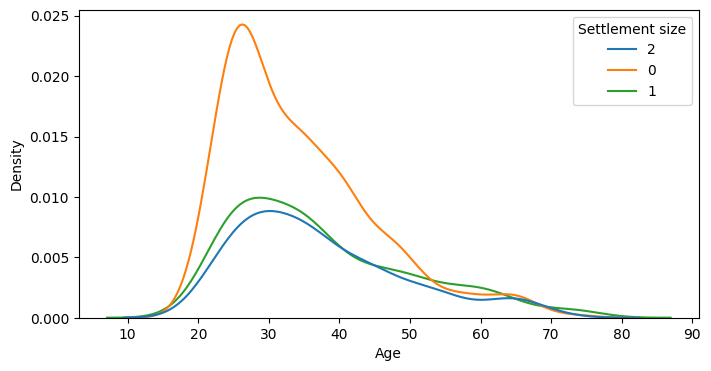

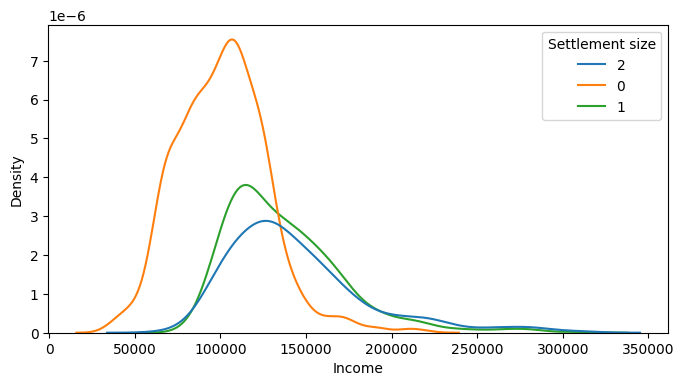

In [64]:
for category in cat_cols:
    for numerical in num_cols:
        plt.figure(figsize=(8,4))
        sns.kdeplot(data=df, x=numerical, hue=category)

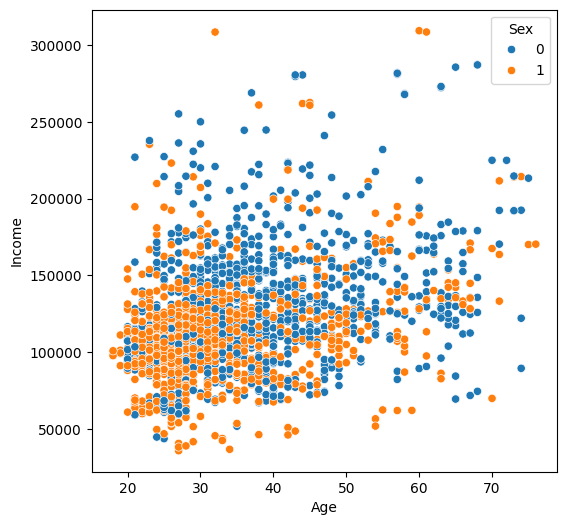

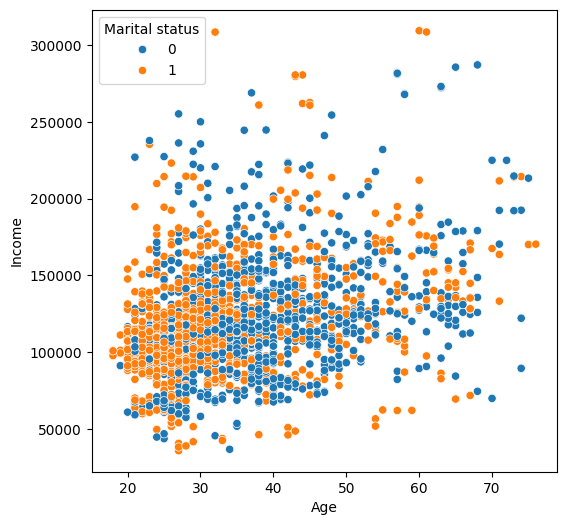

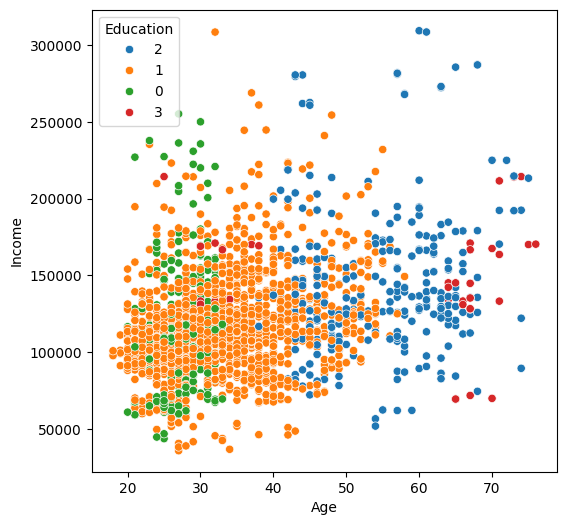

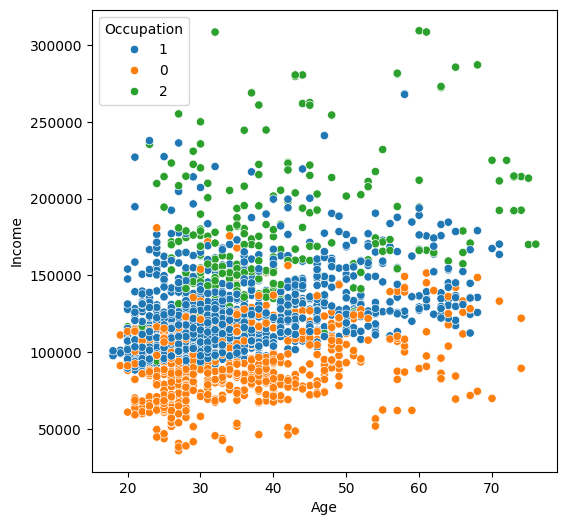

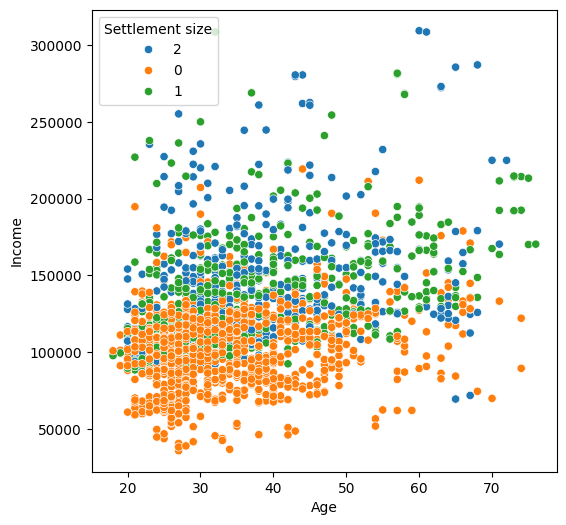

In [66]:
for category in cat_cols:
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x="Age", y="Income", hue=category, data=df)

## K-MEANS Model ve Görselleştirme

In [112]:
from sklearn.cluster import KMeans
kmeans = KMeans()
kmeans

KMeans()

In [113]:
k_fit = kmeans.fit(df)

In [114]:
k_fit.n_clusters

8

In [115]:
k_fit.cluster_centers_

array([[2.82442748e-01, 4.04580153e-01, 3.94618321e+01, 1.09160305e+00,
        1.49102309e+05, 1.22519084e+00, 1.23282443e+00],
       [5.74344023e-01, 5.59766764e-01, 3.23440233e+01, 9.62099125e-01,
        9.04056501e+04, 3.61516035e-01, 3.14868805e-01],
       [2.20338983e-01, 3.55932203e-01, 4.16101695e+01, 1.15254237e+00,
        2.16377220e+05, 1.74576271e+00, 1.50847458e+00],
       [5.36821705e-01, 5.42635659e-01, 3.25523256e+01, 9.39922481e-01,
        1.08988126e+05, 7.84883721e-01, 6.49224806e-01],
       [5.21951220e-01, 4.82926829e-01, 3.13024390e+01, 7.95121951e-01,
        6.62410732e+04, 1.11022302e-16, 1.95121951e-02],
       [3.35483871e-01, 5.09677419e-01, 4.35096774e+01, 1.36129032e+00,
        1.75349200e+05, 1.42580645e+00, 1.26451613e+00],
       [2.91666667e-01, 4.16666667e-01, 5.04583333e+01, 1.66666667e+00,
        2.76182042e+05, 1.91666667e+00, 1.62500000e+00],
       [4.28899083e-01, 4.72477064e-01, 3.84426606e+01, 1.13073394e+00,
        1.27164796e+05, 9

In [116]:
kumeler = k_fit.labels_
kumeler

array([7, 0, 1, ..., 1, 1, 4])

In [117]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


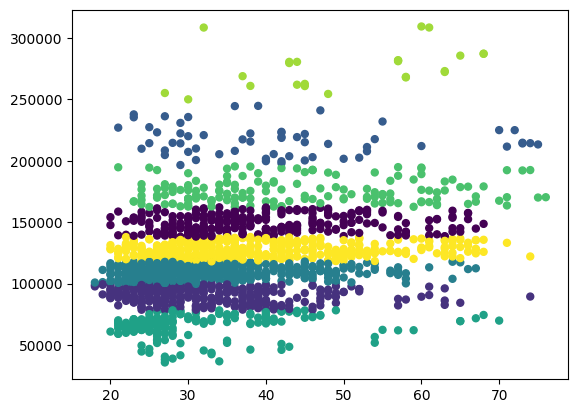

In [118]:
plt.scatter(df["Age"], df["Income"], c = kumeler, s=25, cmap="viridis")

# Optimum Kume Sayısının Belirlenmesi

In [127]:
# silhouette yöntemi
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    cluster_labels = kmeans.fit_predict(df)
    silhouette_scores.append(silhouette_score(df, cluster_labels))

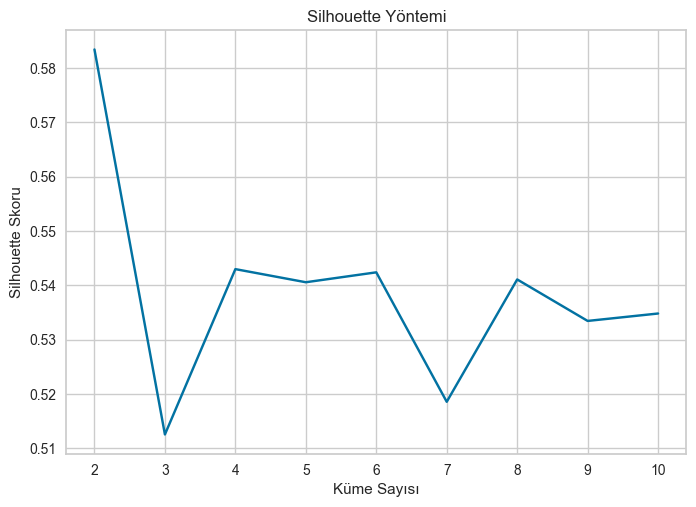

In [128]:
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Yöntemi')
plt.xlabel('Küme Sayısı')
plt.ylabel('Silhouette Skoru')
plt.show()

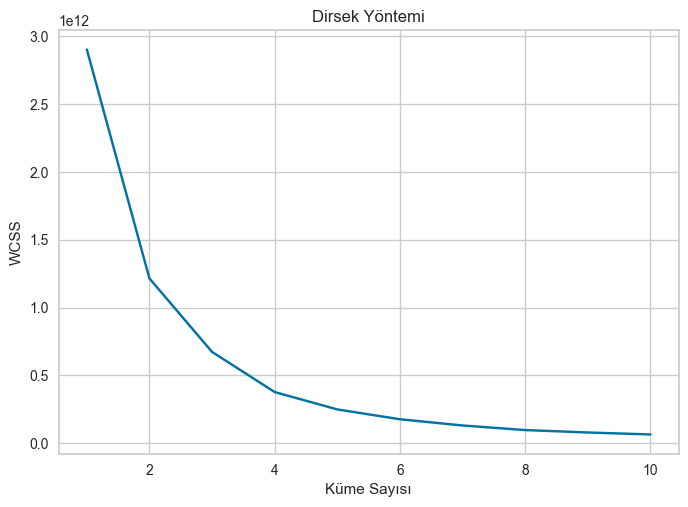

In [129]:
# dirsek yöntemi
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Dirsek Yöntemi')
plt.xlabel('Küme Sayısı')
plt.ylabel('WCSS')
plt.show()

Silhouette Yöntemi ve Dirsek Yöntemi sonuçlarını birleştirirsek:

* Dirsek Yöntemi: 3 veya 4 küme sayısının optimum olduğunu önerdi.
* Silhouette Yöntemi: 2 kümenin en iyi olduğunu gösteriyor, fakat 4 küme de kabul edilebilir.

In [148]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans

KMeans(n_clusters=4)

In [149]:
k_fit = kmeans.fit(df)

In [150]:
k_fit.n_clusters

4

In [151]:
kumeler = k_fit.labels_
kumeler

array([3, 0, 1, ..., 1, 1, 1])

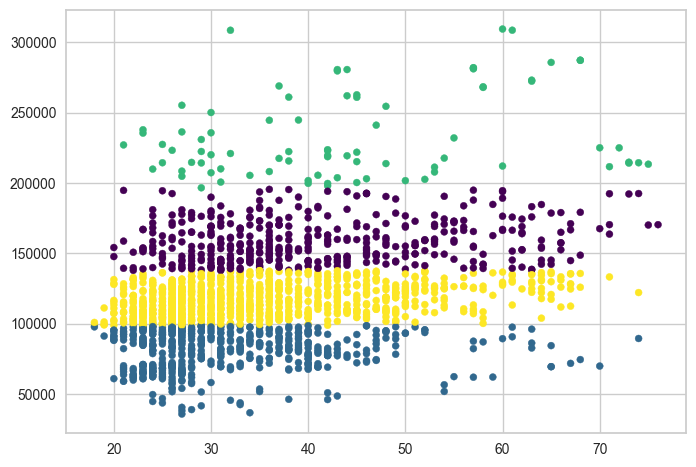

In [152]:
plt.scatter(df["Age"], df["Income"], c = kumeler, s=25, cmap="viridis")